# Sentiment analysis 

In [35]:
#import all necesary libraries
import numpy as np 
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import re
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
#loading the dataset
df=pd.read_csv(r"C:\Users\USER\Downloads\archive\Sentiment.csv")
df.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,name,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,I_Am_Kenzi,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,PeacefulQuest,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,PussssyCroook,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,MattFromTexas31,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,sharonDay5,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [14]:
#understanding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13871 non-null  int64  
 1   candidate                  13775 non-null  object 
 2   candidate_confidence       13871 non-null  float64
 3   relevant_yn                13871 non-null  object 
 4   relevant_yn_confidence     13871 non-null  float64
 5   sentiment                  13871 non-null  object 
 6   sentiment_confidence       13871 non-null  float64
 7   subject_matter             13545 non-null  object 
 8   subject_matter_confidence  13871 non-null  float64
 9   candidate_gold             28 non-null     object 
 10  name                       13871 non-null  object 
 11  relevant_yn_gold           32 non-null     object 
 12  retweet_count              13871 non-null  int64  
 13  sentiment_gold             15 non-null     obj

In [15]:
df.shape

(13871, 21)

In [16]:
#checking for missing values
df.isna().sum()

id                               0
candidate                       96
candidate_confidence             0
relevant_yn                      0
relevant_yn_confidence           0
sentiment                        0
sentiment_confidence             0
subject_matter                 326
subject_matter_confidence        0
candidate_gold               13843
name                             0
relevant_yn_gold             13839
retweet_count                    0
sentiment_gold               13856
subject_matter_gold          13853
text                             0
tweet_coord                  13850
tweet_created                    0
tweet_id                         0
tweet_location                3912
user_timezone                 4403
dtype: int64

In [17]:
df = df[['text', 'sentiment']]  # Keep only what you need for sentiment analysis
df.head()

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


In [18]:
#check for null values
df.isna().sum()

text         0
sentiment    0
dtype: int64

In [21]:
df.shape

(13871, 2)

In [ ]:
#plotting the distribution of sentiments
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.show()

In [25]:
#split the dataset into training and testing sets
X = df['text']       # Your tweet or review text
y = df['sentiment']  # Your target sentiment
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Lets do preprocessing and data cleaning 

You'll need a custom preprocessing function before vectorization, since TfidfVectorizer only expects raw strings

# Using random forest classifier 

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
c:\Users\USER\anacondaNEW3\envs\flatiron-env\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.661981981981982
Classification Report:
               precision    recall  f1-score   support

    Negative       0.70      0.90      0.79      1722
     Neutral       0.47      0.22      0.30       612
    Positive       0.56      0.35      0.43       441

    accuracy                           0.66      2775
   macro avg       0.58      0.49      0.51      2775
weighted avg       0.63      0.66      0.62      2775



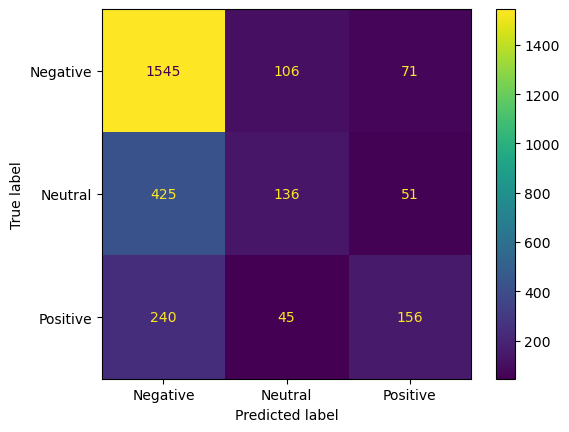

In [ ]:
# Download required NLTK resources
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Text cleaner
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Improved tokenizer
def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)
    return [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

# Pipeline
pipe = Pipeline([
    ('vectorizer', TfidfVectorizer(
        preprocessor=clean_text,
        tokenizer=tokenize_and_lemmatize,
        ngram_range=(1, 2),      
        min_df=3,                 
        max_df=0.9,               
        max_features=300,     
    )),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1,
        criterion='gini'
    ))
])

# Train
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot()


# Using logistic regression

c:\Users\USER\anacondaNEW3\envs\flatiron-env\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.6418018018018018
Classification Report:
               precision    recall  f1-score   support

    Negative       0.81      0.69      0.75      1722
     Neutral       0.43      0.53      0.48       612
    Positive       0.48      0.62      0.54       441

    accuracy                           0.64      2775
   macro avg       0.57      0.61      0.59      2775
weighted avg       0.68      0.64      0.65      2775



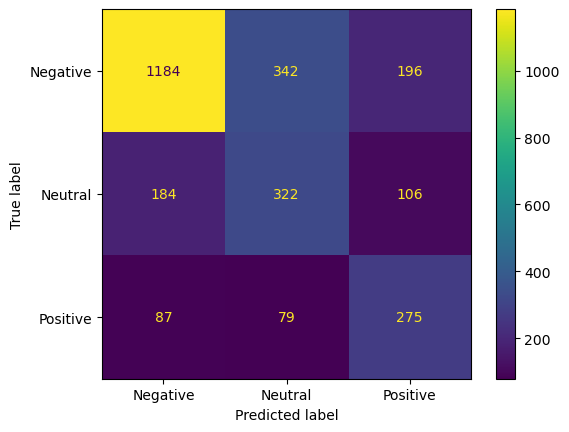

In [ ]:
#using logistic regression
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Custom preprocessor
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Custom tokenizer with lemmatization and stopword removal
def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)
    return [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

# Pipeline
pipe = Pipeline([
    ('vectorizer', TfidfVectorizer(
        preprocessor=clean_text,
        tokenizer=tokenize_and_lemmatize,
        ngram_range=(1, 2),      
        min_df=3,                 
        max_df=0.9,              
        max_features=10000,
    )),
    ('classifier', LogisticRegression(class_weight='balanced',
                                       random_state=42,))
])
#fit the model
pipe.fit(X_train,y_train)
#make predictions
y_pred=pipe.predict(X_test)
#evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Plot Confusion Matrix# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot()
